In [90]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras
import numpy as np


In [52]:
(picture_train, clas_train), (picture_test, clas_test) = mnist.load_data()

In [53]:
print("min:", clas_train.min())
print("max:", clas_train.max())

min: 0
max: 9


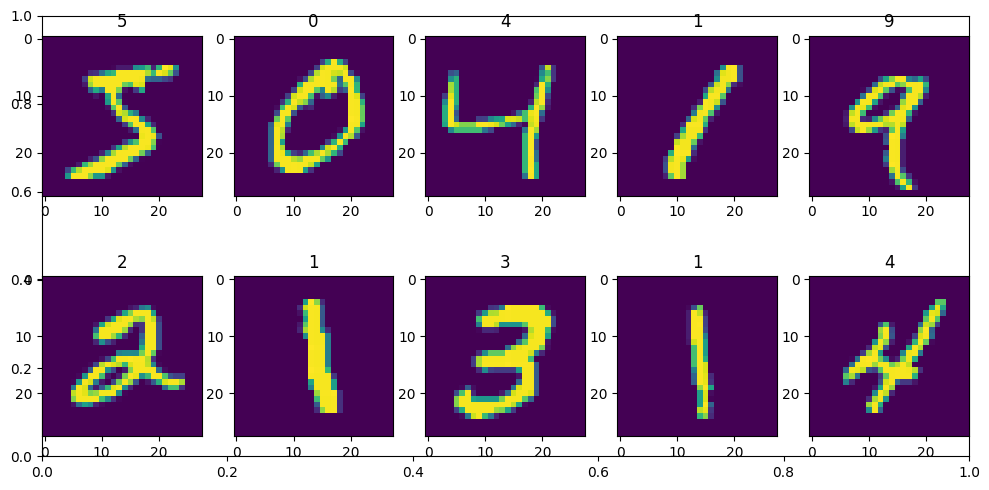

In [68]:
tag = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
total_tag = 10

fig, axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for pic in range(10):
    plt.subplot(2, 5, pic+1)
    plt.imshow(picture_train[pic])
    plt.title(tag[clas_train[pic]])

[0]


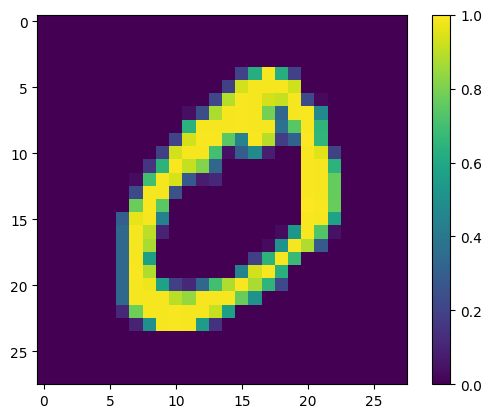

In [92]:
plt.imshow(picture_train[1])
plt.colorbar()
print(np.unique(clas_train[1]))

In [78]:
#Tratamento da imagem para CNN

#picture_train = picture_train.reshape((picture_train.shape[0], 28, 28, 1))
#picture_test = picture_test.reshape((picture_test.shape[0], 28, 28, 1))


(60000, 28, 28, 1)


In [62]:
#Normalização
# 0(Preto) - 255(Branco)
# Tranformar 0-255 -> 0-1

picture_train = picture_train/255
picture_test = picture_test/255

In [98]:
"""
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1), activation=tf.nn.relu),
    keras.layers.MaxPooling2D((2,2)), #Angulos
    keras.layers.Flatten(), #Passar a imagem para 1D
    keras.layers.Dense(100, activation=tf.nn.relu), #Camada oculta
    keras.layers.Dense(50, activation=tf.nn.relu), #Camada oculta
    keras.layers.Dropout(0.2), #Barra o overfitting
    keras.layers.Dense(10, activation=tf.nn.softmax) #Camada de saída
])
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Passar a imagem para 1D
    keras.layers.Dense(128, activation=tf.nn.relu), #Camada oculta
    keras.layers.Dense(10, activation=tf.nn.softmax) #Camada de saída
])

#compila
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(picture_train, clas_train, epochs=10, validation_split=0.2)


Epoch 1/10


c:\Users\luis_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8671 - loss: 0.4795 - val_accuracy: 0.9543 - val_loss: 0.1588
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9619 - loss: 0.1346 - val_accuracy: 0.9633 - val_loss: 0.1216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 - loss: 0.0899 - val_accuracy: 0.9669 - val_loss: 0.1084
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9807 - loss: 0.0637 - val_accuracy: 0.9703 - val_loss: 0.0990
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9719 - val_loss: 0.0953
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9896 - loss: 0.0371 - val_accuracy: 0.9734 - val_loss: 0.0929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0294 - val_accuracy: 0.9745 - val_loss: 0.0898
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accurac

In [99]:
predict = model.predict(picture_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


In [101]:
print(predict[7])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


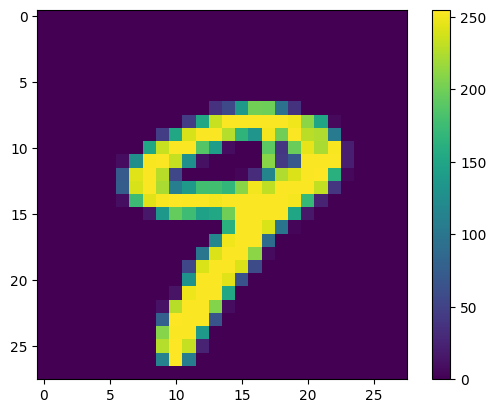

In [102]:
plt.imshow(picture_test[9])
plt.colorbar()